# Visualization

**Top Importanat Features effecting employee performance**

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [49]:
data = pd.read_csv('preprocessed_data.csv')

In [50]:
x = data.drop('PerformanceRating', axis=1)  
y = data['PerformanceRating']  

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [52]:

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  

# Fit the model on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

In [53]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [54]:

feature_importances = rf_classifier.feature_importances_
feature_names = x.columns  

In [55]:
# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

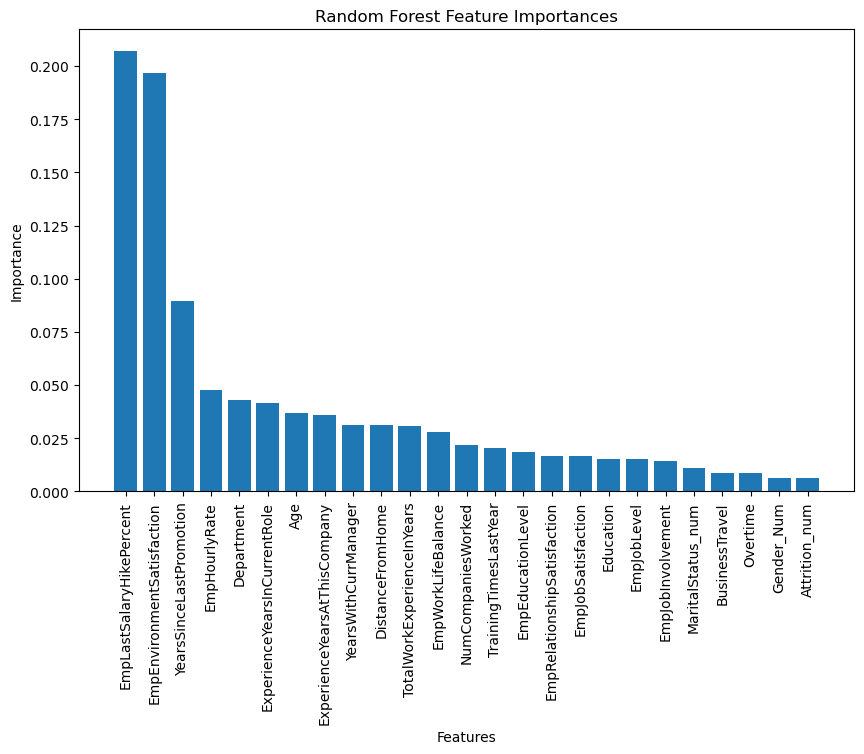

In [56]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

**This bar chart visualizes the relative importance of each feature as determined by the Random Forest model. Each bar represents a feature, ranked by its contribution to the model’s predictive power. The x-axis lists the features, sorted in descending order of importance, while the y-axis quantifies their influence.
From this plot, we can quickly identify which variables are driving the model’s decisions. Features with taller bars are more influential, suggesting they carry stronger predictive signals. Conversely, shorter bars indicate features with minimal impact, which may be candidates for exclusion or dimensionality reduction.
This visualization is crucial for interpreting model behavior, validating domain-specific assumptions, and informing feature selection for future iterations.**

# scatter plot

In [57]:
feature_importances = rf_classifier.feature_importances_
feature_names = x.columns

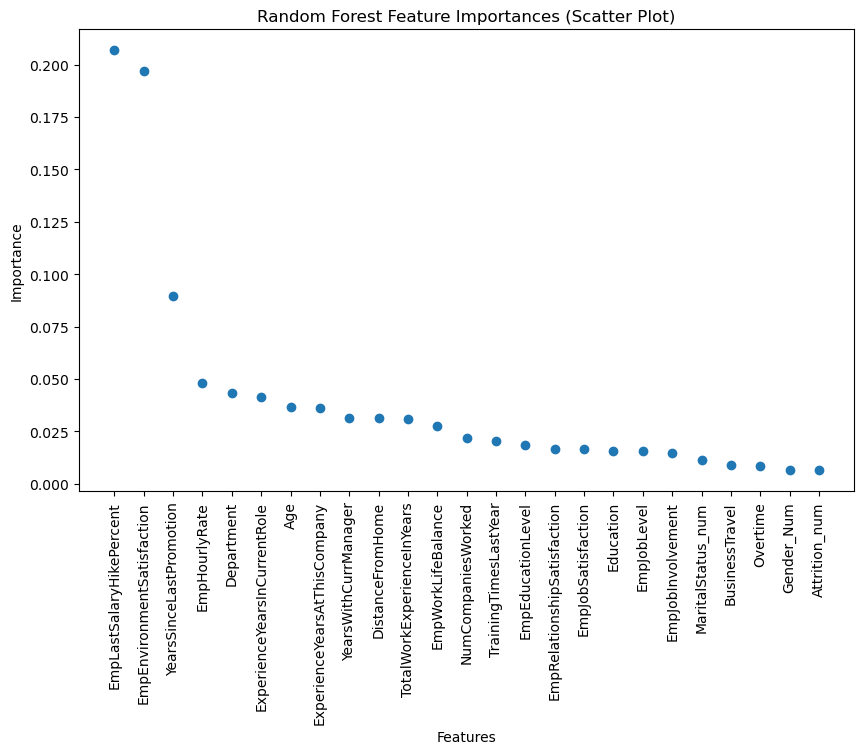

In [58]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances (Scatter Plot)')
plt.show()

**In this visualization, plt.scatter is used to create a scatter plot that highlights the relative importance of each feature. Each point on the plot corresponds to a feature, enabling a clear visual comparison of the influence of different variables within the model. The x-axis represents the individual features, while the y-axis displays their corresponding importance scores, making it easy to observe the distribution and identify which features contribute most significantly to the prediction.**


# EmpLastSalarayhikePercent vs Performance ranking

In [59]:
data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

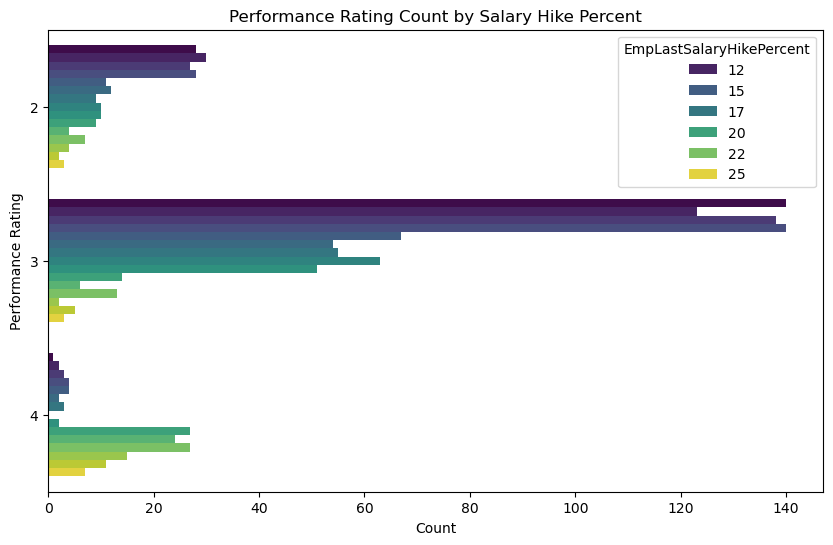

In [60]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(y="PerformanceRating",hue="EmpLastSalaryHikePercent",data=data,palette="viridis")
plt.title("Performance Rating Count by Salary Hike Percent")
plt.xlabel("Count")
plt.ylabel("Performance Rating")
plt.show()

**In this visualization, we use sns. countplot from the Seaborn library to generate a horizontal count plot. The y-axis represents the PerformanceRating categories, while the bars are segmented by different values of EmpLastSalaryHikePercent, each distinguished by color. This allows us to compare how salary hike percentages are distributed across performance ratings.**


In [61]:
# Slicing the all coloums of Sales Row 
Development = data[data.EmpDepartment == 'Development'] 
Development.head(4)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3


**Performance Rating with respect to number of employees**

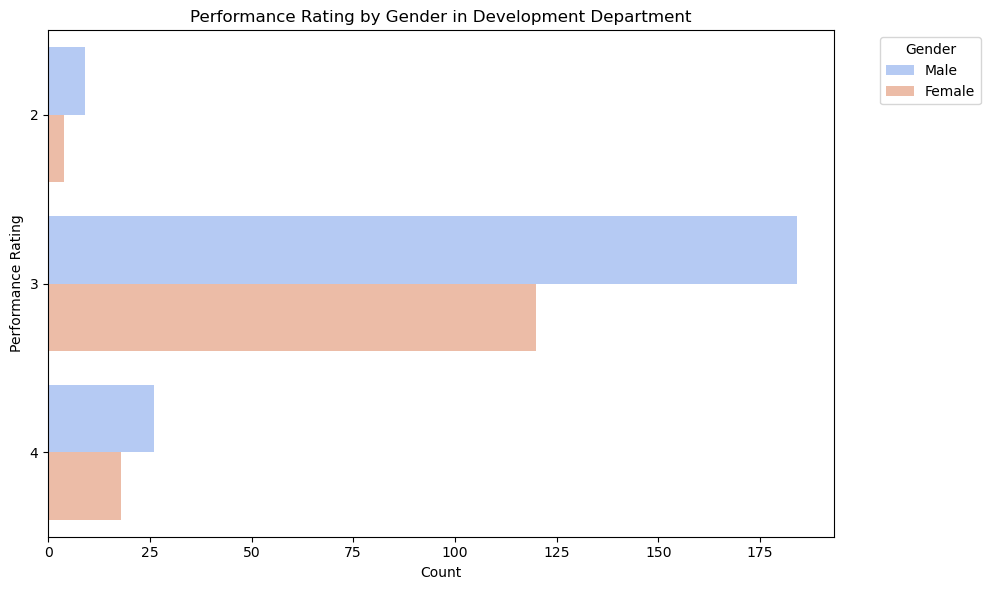

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(y="PerformanceRating", hue="Gender", data=Development, palette="coolwarm")
plt.title("Performance Rating by Gender in Development Department")
plt.xlabel("Count")
plt.ylabel("Performance Rating")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**This count plot illustrates the distribution of performance ratings among male and female employees within the Development department. Each horizontal bar represents the number of employees who received a specific performance rating, with colors distinguishing gender.
By visualizing performance ratings side-by-side, this chart helps identify potential patterns or disparities in how male and female employees are evaluated. A balanced distribution across genders suggests equitable recognition, while noticeable gaps may prompt further analysis into evaluation criteria, role assignments, or departmental dynamics.
This visualization serves as a valuable diagnostic tool for HR and leadership teams aiming to ensure fairness and transparency in performance assessments.**

**Performance Rating with respect to Gender**

In [67]:
female_employees = data[data['Gender'] == 'Female']
female_employees.head(4)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3
11,E1001024,47,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,3,...,4,28,2,2,22,2,11,13,No,3


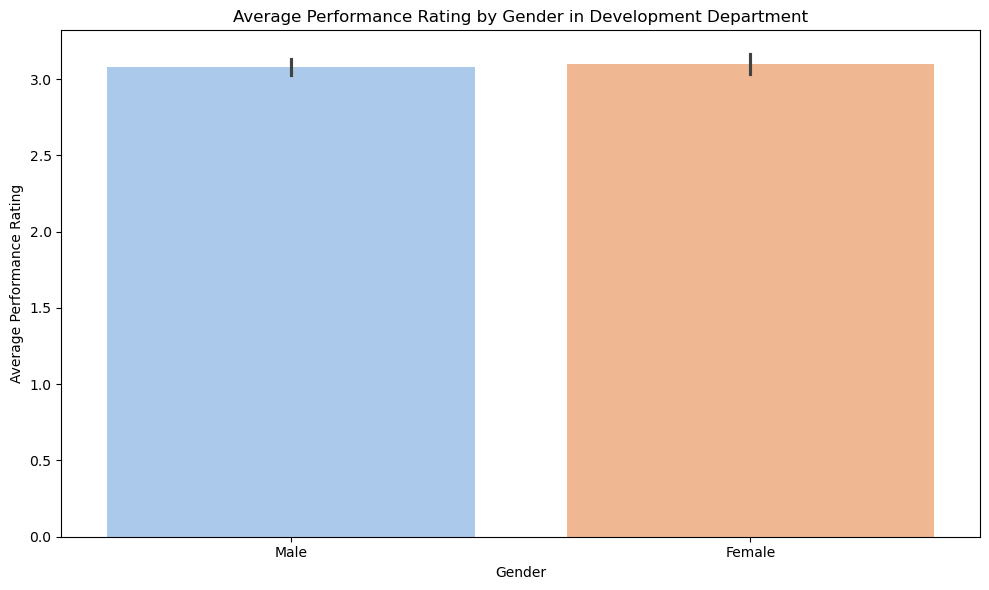

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Development, x='Gender', y='PerformanceRating', estimator='mean', hue='Gender', palette='pastel', legend=False)
plt.title("Average Performance Rating by Gender in Development Department")
plt.xlabel("Gender")
plt.ylabel("Average Performance Rating")
plt.tight_layout()
plt.show()

**This bar plot illustrates the average performance rating of employees in the Development department, segmented by gender. Each bar represents the mean rating for male and female employees, offering a clear comparison of how performance evaluations vary across gender.
If the bars are similar in height, it suggests equitable performance outcomes. A noticeable gap, however, may prompt further analysis into evaluation criteria, role distribution, or unconscious bias in performance assessments.**

**Performance Rating with respect to Age Group**

In [70]:
age_employees = data[data['Age'] > 40]
age_employees.head(4)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3


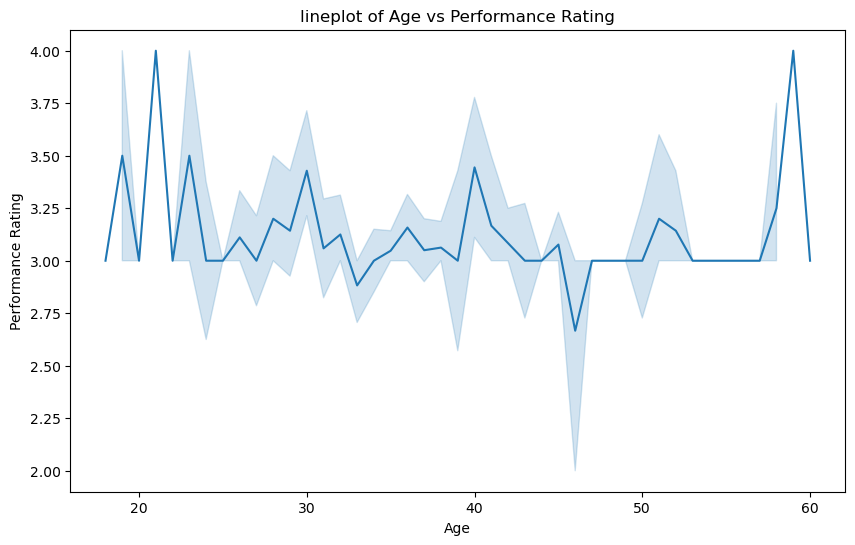

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Development, x='Age', y='PerformanceRating')
plt.title("lineplot of Age vs Performance Rating")
plt.xlabel("Age")
plt.ylabel("Performance Rating")
plt.show()

**This line plot illustrates the relationship between employee age and performance rating within the Development department. Each point on the curve represents the average performance rating for a given age, allowing us to observe how performance trends evolve across different age groups.
The visualization helps identify whether performance improves with experience, plateaus at mid-career, or declines with age. A rising trend may suggest that older employees bring more value through experience and institutional knowledge, while a flat or declining trend could prompt further analysis into role fit, training opportunities, or evaluation criteria.
This plot serves as a strategic lens for workforce planning, helping HR and leadership teams align talent development with age demographics.**


**Performance According to the Experience Level**

In [80]:
experience_employees = data['TotalWorkExperienceInYears'].value_counts()
experience_employees.head(4)

TotalWorkExperienceInYears
10    159
6     105
8      85
9      77
Name: count, dtype: int64

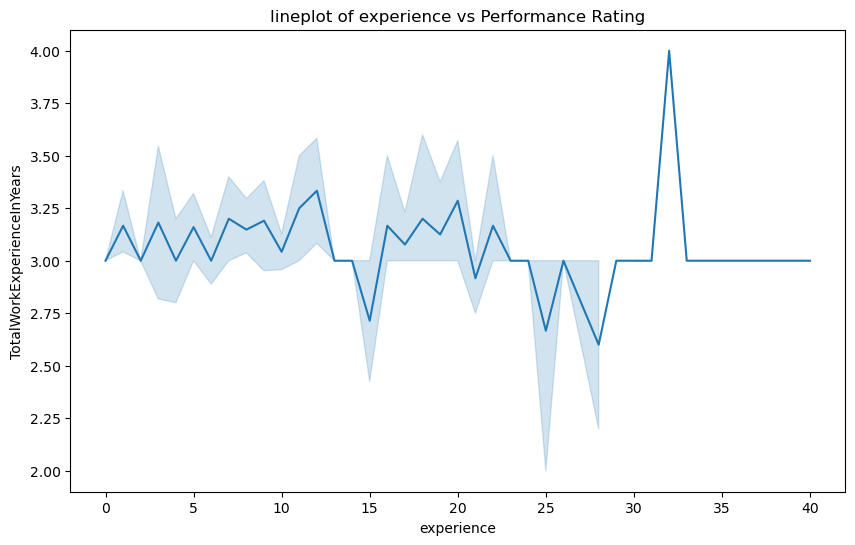

In [81]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Development, x='TotalWorkExperienceInYears', y='PerformanceRating')
plt.title("lineplot of experience vs Performance Rating")
plt.xlabel("experience")
plt.ylabel("TotalWorkExperienceInYears")
plt.show()

**This line plot illustrates the relationship between employees' total work experience and their performance ratings within the Development department. The x-axis represents years of professional experience, while the y-axis shows the corresponding performance ratings.
By connecting average ratings across experience levels, the plot reveals how performance trends evolve. A rising curve may suggest that seasoned professionals consistently deliver higher value, while a flat or declining trend could indicate that experience alone doesn't guarantee top performance.
This visualization is valuable for identifying growth patterns, assessing talent maturity, and guiding decisions around mentorship, promotion, and role alignment.**